<a href="https://colab.research.google.com/github/Zach-Seymour/FDSFE_ZSeymour/blob/main/Sep_26(In-Class%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import pylab as plt
import numpy as np

In [10]:
walking = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv",
header =None, names=['population','wspeed','city'])

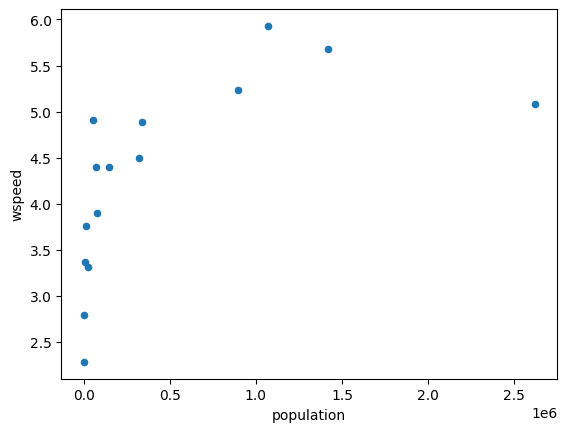

In [16]:
walking.plot('population','wspeed',kind='scatter');

In [12]:
walking['log_pop']=np.log10(walking['population'])

In [13]:
walking

,population,wspeed,city,log_pop
0,2520.0,2.28,Itea,3.401401
1,370.0,2.79,Psychro,2.568202
2,5650.0,3.37,Netanya,3.752048
3,14100.0,3.76,Corte,4.149219
4,23300.0,3.31,Safed,4.367356
5,52600.0,4.91,Dimona,4.720986
6,73300.0,4.40,Netanya,4.865104
7,77100.0,3.90,New Haven,4.887054
8,145000.0,4.40,Jerusalem,5.161368
9,320000.0,4.49,Brno,5.505150


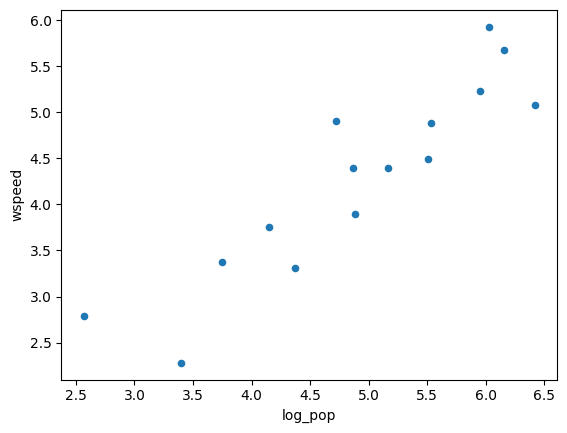

In [15]:
walking.plot('log_pop','wspeed',kind='scatter');

Text(0, 0.5, 'walking speed (feet/s)')

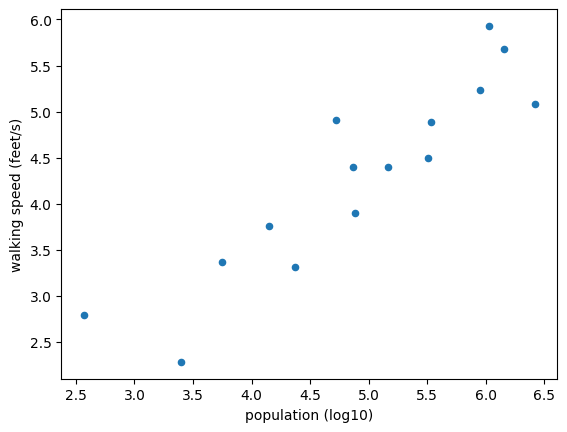

In [17]:
ax = walking.plot('log_pop', 'wspeed',kind = 'scatter')
ax.set_xlabel('population (log10)')
ax.set_ylabel('walking speed (feet/s)')

Text(0, 0.5, 'walking speed (feet/s)')

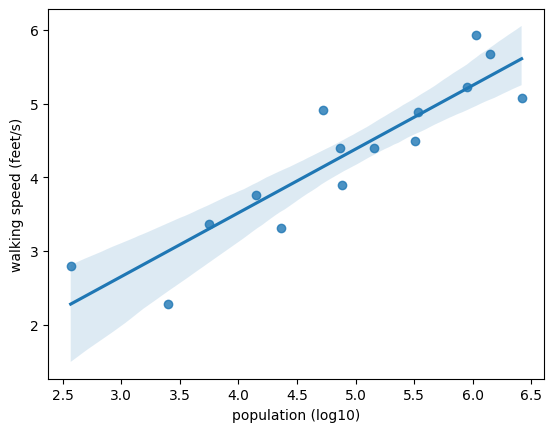

In [20]:
import seaborn as sns
ax = sns.regplot(x = walking['log_pop'], y= walking['wspeed']);
ax.set_xlabel('population (log10)')
ax.set_ylabel('walking speed (feet/s)')

In [21]:
def sumsqerror(y_true,y_pred):
  """
  """
  return((y_true - y_pred) ** 2).sum()

In [22]:
def line(slope, intercept, x):
  return slope * x + intercept

In [28]:
minnow = 1e7
for s in np.arange(0,3,0.1):
  for i in np.arange(0,2,0.01):
    prediction =line(s,i,walking['log_pop'])
    sse = sumsqerror(walking['wspeed'], prediction)
    if sse < minnow:
      minnow = sse
      slope_manual, intercept_manual = s, i
slope_manual, intercept_manual

(0.8, 0.38)

In [24]:
walking['prediction_manual']=line(slope_manual, intercept_manual,walking['log_pop'])

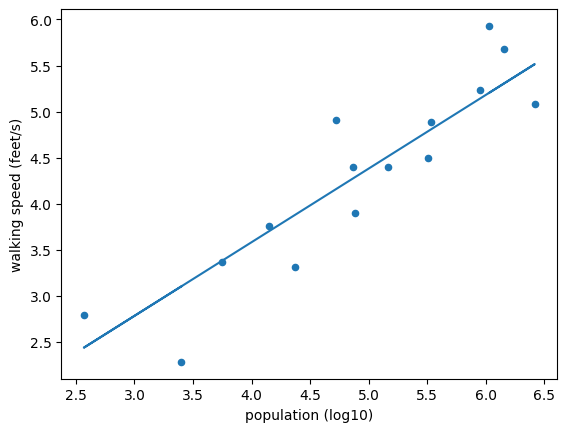

In [27]:
ax = walking.plot('log_pop', 'wspeed',kind = 'scatter')
ax.plot(walking['log_pop'],walking['prediction_manual'],label='manual')
ax.set_xlabel('population (log10)')
ax.set_ylabel('walking speed (feet/s)');

In [29]:
# np.polyfit

In [30]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()
# linreg.fit(walking['log_pop'],walking['wspeed'])
linreg

LinearRegression()

In [31]:
walking['log_pop'].values.reshape(-1,1)

array([[3.40140054],
       [2.56820172],
       [3.75204845],
       [4.14921911],
       [4.36735592],
       [4.72098574],
       [4.86510397],
       [4.88705438],
       [5.161368  ],
       [5.50514998],
       [5.53275438],
       [5.95230801],
       [6.41830129],
       [6.15228834],
       [6.02938378]])

In [35]:
linreg.fit(walking['log_pop'].values.reshape(-1,1),walking['wspeed'])
linreg.intercept_

0.05664889151453334

In [38]:
walking['sklearn_pred']=linreg.predict(walking['log_pop'].values.reshape(-1,1))

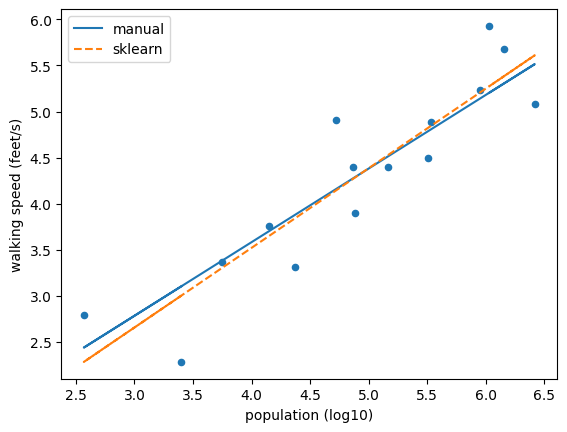

In [39]:
ax = walking.plot('log_pop', 'wspeed',kind = 'scatter')
ax.plot(walking['log_pop'],walking['prediction_manual'],label='manual')
ax.plot(walking['log_pop'],walking['sklearn_pred'],'--',label='sklearn',)
ax.legend()
ax.set_xlabel('population (log10)')
ax.set_ylabel('walking speed (feet/s)');

In [41]:
linreg.score(walking['log_pop'].values.reshape(-1,1),walking['wspeed'])

0.8216814457855732